In [1]:
import sys
sys.path.append('../../')
from autograd import numpy as np
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import multilayer_perceptron_library as multi
from mlrefined_libraries import math_optimization_library as optlib


datapath = './mlrefined_datasets/nonlinear_superlearn_datasets/'

import matplotlib.pyplot as plt

#from matplotlib import rcParams
#rcParams['figure.autolayout'] = True
#%matplotlib notebook


%load_ext autoreload
%autoreload 2

# 13.1
Two-class classification with neural networks
Repeat the two-class classification experiment described in Example 13.4 begin-
ning with the implementation outlined in Section 13.2.6. You need not reproduce
the result shown in the top row of Figure 13.9, but can verify your result via
checking that you can achieve perfect classification of the data.

In [2]:
data = np.loadtxt(datapath + '2_eggs.csv', delimiter=',')
x = data[:2,:].T.astype(float).T
y = data[2,:][np.newaxis,:].astype(int)
print(x.shape, y.shape)


(2, 96) (1, 96)


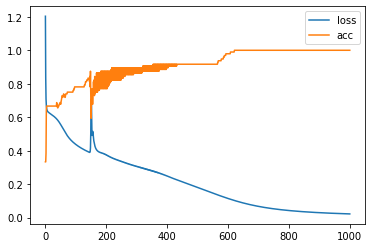

In [10]:
module = multi.basic_lib.super_setup.Setup(x,y)

module.preprocessing_steps(normalizer = 'standard')

module.make_train_val_split(train_portion = 1) #using all data for training

module.choose_cost(name = 'softmax')

layer_sizes = [10,10,10,10]
module.choose_features(feature_name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'tanh',scale = 0.5)

module.fit(max_its = 1000,alpha_choice = 10**(-1),verbose = False)

cost_history = module.train_cost_histories
acc_history = module.train_accuracy_histories



plt.plot(cost_history[0], label="loss")
plt.plot(acc_history[0], label="acc")
plt.legend()


# 13.2
Multi-class classification with neural networks
Repeat the multi-class classification experiment described in Example 13.4 be-

ginning with the implementation outlined in Section 13.2.6. You need not re-
produce the result shown in the bottom row of Figure 13.9, but can verify your
result via checking that you can achieve perfect classification of the data.

In [23]:
data = np.loadtxt(datapath + '3_layercake_data.csv', delimiter=',')
x = data[:2,:].T.astype(float).T
y = data[2,:][np.newaxis,:].astype(int)
print(x.shape, y.shape)

(2, 110) (1, 110)


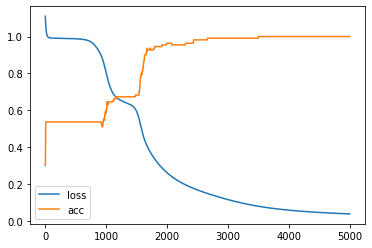

In [21]:
module = multi.basic_lib.super_setup.Setup(x,y)

module.preprocessing_steps(normalizer = 'standard')

module.make_train_val_split(train_portion = 1) #using all training data

module.choose_cost(name = 'multiclass_softmax')

layer_sizes = [12,5]
module.choose_features(feature_name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'tanh',scale = 0.1)

module.fit(max_its = 5000,alpha_choice = 10**(-1),verbose = False)

cost_history = module.train_cost_histories
acc_history = module.train_accuracy_histories



plt.plot(cost_history[0], label="loss")
plt.plot(acc_history[0], label="acc")
plt.legend()



# 13.3 
(a) Find the total number Q of tunable parameters in a general L-hidden-layer
neural network, in terms of variables expressed in the layer sizes list in Section
13.2.6.

In [55]:
def network_initializer(layer_sizes, scale):
    
    weights = []
    
    for k in range(len(layer_sizes)-1):
        U_k = layer_sizes[k]
        U_k_plus_1 = layer_sizes[k+1]
        
        weight = scale*np.random.randn(U_k+1, U_k_plus_1)
        weights.append(weight)
            
    return np.array(weights, dtype=np.object)

In [56]:
layer_sizes = [2, 10, 10, 10, 2]
weights = network_initializer(layer_sizes, 0.5)

total_param_num = 0

for w in weights:
    total_param_num += w.size
    print(w.shape, w.size)
    
print(f"total number of tunable parameters = {total_param_num}")

(3, 10) 30
(11, 10) 110
(11, 10) 110
(11, 2) 22
total number of tunable parameters = 272


(b) Based on your answer in part (a), explain how the input dimension N and
number of datapoints P each contributes to Q. How is this different from what
you saw with kernel methods in the previous chapter?

Answer: (b) The input dimension N only affects the first set of weights. So the number of parameters will be (N+1)*10 + 110+110+22 

The number o